# El proceso de toma de decisiones


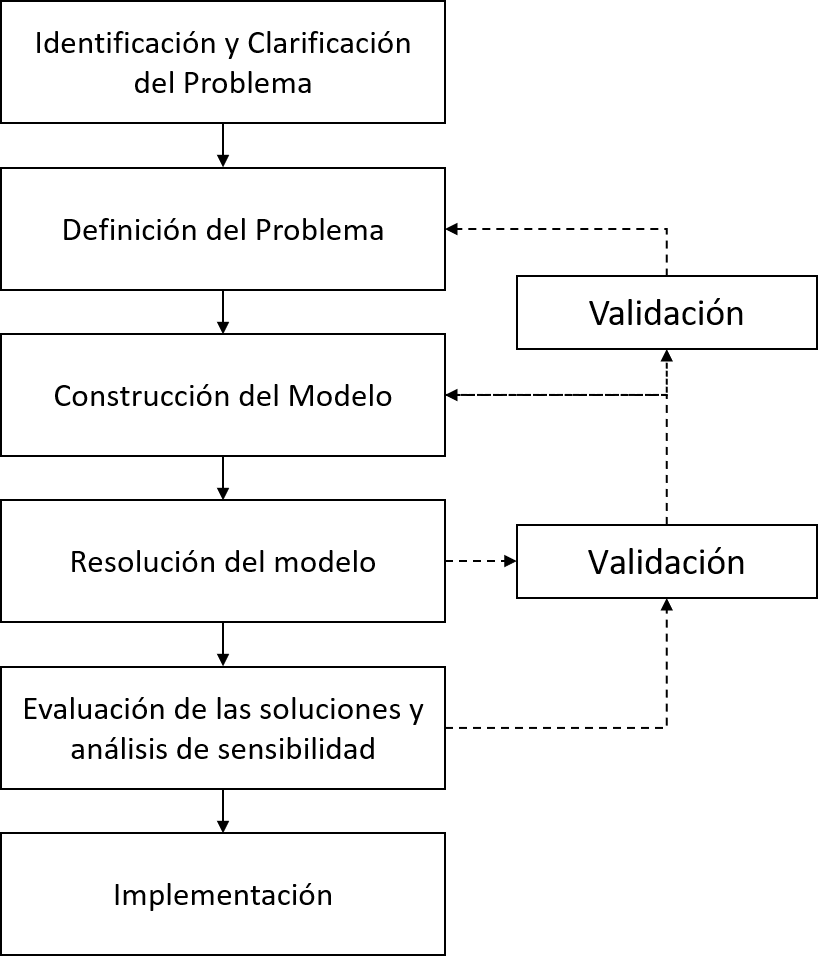

# Resolución de problema de optimización lineal

### Lenguajes algebráicos \& Mototores de optimización

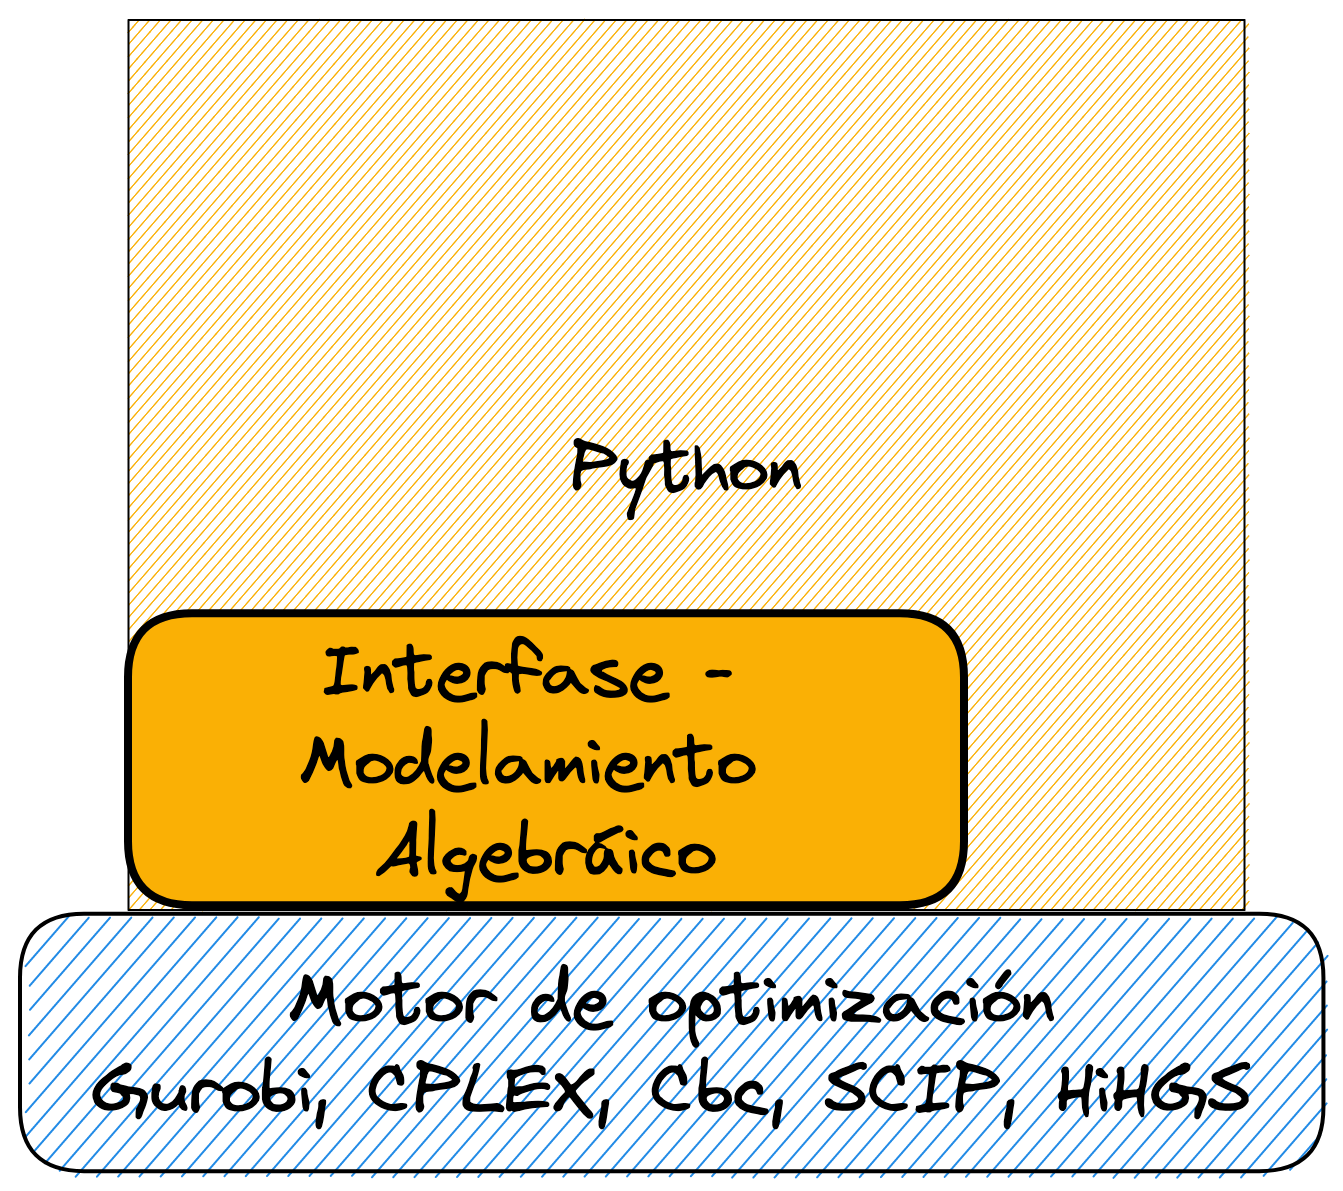

# Instalación

## Librerías de modelamiento algebráico

```python 

!pip install pulp


```

In [ ]:
# Instalación de los paquetes necesarios de optimización

In [5]:
!pip install highspy


In [26]:
import pulp as plp
plp.list_solvers(onlyAvailable=False)


['GLPK_CMD',
 'PYGLPK',
 'CPLEX_CMD',
 'CPLEX_PY',
 'GUROBI',
 'GUROBI_CMD',
 'MOSEK',
 'XPRESS',
 'XPRESS',
 'XPRESS_PY',
 'PULP_CBC_CMD',
 'COIN_CMD',
 'COINMP_DLL',
 'CHOCO_CMD',
 'MIPCL_CMD',
 'SCIP_CMD',
 'HiGHS_CMD']

# Caso MedicamentosX inc.

## Contexto

**MedicamentosX Inc**. es una empresa manufacturera de medicamentos que produce algunas soluciones para el tratamiento de una enfermedad. Las soluciones se produce a partir de dos ingredientes principales: **Ingrediente A** y **Ingrediente B**. 

Ambos ingredientes se diferencian en su composición química y en la cantidad de solución que pueden producir. Una unidad de  **Ingrediente A** produce 0.3 litros de **solución X**, 0.4 litros de **solución Y** y 0.2 de **solución Z**. Por su lado, una  unidad de  **Ingrediente B** produce 0.4 litros de **solución X**, 0.2 de **solución Y** y 0.3 de **solución Z**. 

Los ingredientes también difieren en precio y disponibilidad. **MedicamentosX Inc**. puede comprar **Ingrediente A** de un proveedor nacional a un precio de $\$15$ por unidad o **Ingrediente B** de un proveedor internacional a un precio de $\$20$ por unidad. 

La empresa necesita producir 2000 litros de  **solución X**, 1500 de **solución Y**   diarios  500  de  **solución Z*.

¿Cómo se puede cumplir con estos requerimientos de manera más eficiente?


# Componentes de un problema de optimización

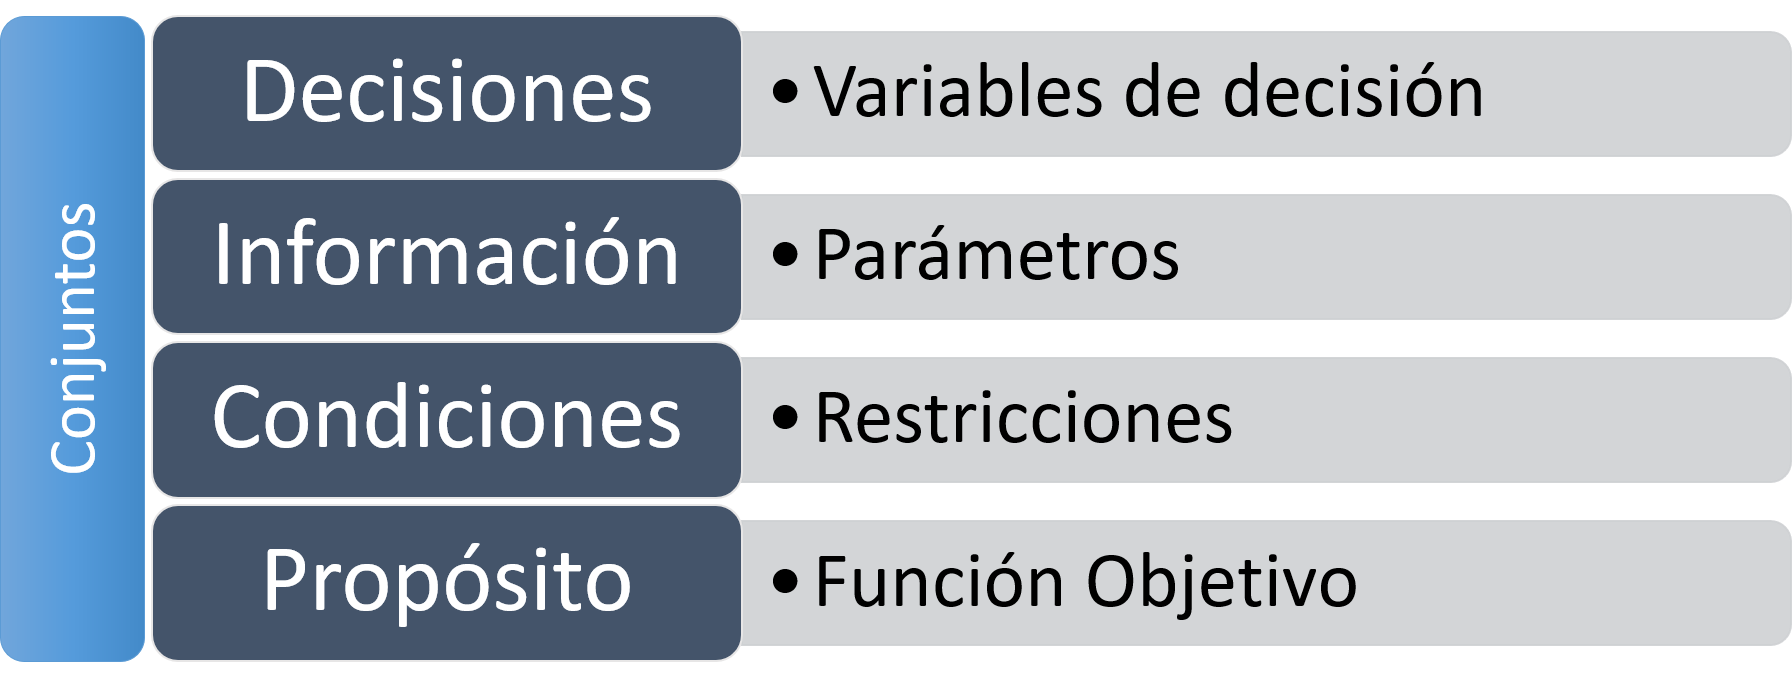

# Variables de decisión

### Qué debe decidirse?

En el caso de la fabricación de nuestro medicamento, se deben tomar decisiones respecto a:

1. La cantidad de ingrediente A a comprar y procesar con origen en el proveedor aacional.
2. La cantidad de ingrediente B a comprar y procesar con origen en el proveedor internacional.

# Información

### Con qué información cuenta la compañía para soportar su proceso de toma de decisiones?

A continuación presentamos la información que se tiene disponible para la fabricación del medicamento:

### Producción por unidad de materia prima

| Producto     | Nacional | Internacional |
|--------------|-------------|-------------|
| 1 | 0.3 unidades | 0.4 unidades |
| 2 | 0.4 unidades | 0.2 unidades |
| 3 | 0.2 unidades | 0.3 unidades |

### Producción requerida

| Producto   | Producción mínima requerida |
|------------|------------------------------|
| Producto X | 2000 unidades                |
| Producto Y | 1500 unidades                |
| Producto Z | 500 unidades                 |

### Costo y disponibilidad de la materia prima

| Proveedor | Precio por unidad | Capacidad de unidades |
|-----------|------------------|-----------------------|
| Nacional         | \$20              | 9000 unidades         |
| Internacional         | \$15              | 6000 unidades         |

# Condiciones

### ¿Qué especificaciones se deben cumplir?



1.   Las cantidades deben ser positivas
2.   Se debe satisfacer la demanda de **producto X**
3.   Se debe satisfacer la demanda de **producto Y**
4.   Se debe satisfacer la demanda de **producto Z**
5.   Se debe respetar la disponibilidad del proveedor nacional
6.   Se debe respetar la disponibilidad de  proveedor internacional


# Propósito

### ¿Cómo cuantificar el impacto de una decisión?

¿Cuál es el principal interés de **MedicamentosX**?

**Respuesta**

Minimizar los costos totales de compra de ingredientes.

### Represente el problema usando notación matemática


#### Conjuntos

1.   Proveedores : $\{Nacional, Internacional\}$
2.   Productos: $\{Producto_1, Producto_2,Producto_3\}$

#### Variables de decisión

1.   $x_A$ : Cantidad a comprar de crudo proveniente de Arabia
2.   $x_B$ : Cantidad a comprar de crudo proveniente de Venezuela

#### Restricciones

1.   $0.3x_A+0.4x_B \geq 2000$
2.   $0.4x_A+0.2x_B \geq 1500$
3.   $0.2x_A+0.3x_B \geq 500$
4.   $x_A \leq 9000$
5.   $x_B \leq 6000$
6.   $x_A \geq 0$
7.   $x_B \geq 0$

#### Función Objetivo

1.   $20x_A+15x_B $

#### Típicamente un problema de programación matemática se representa así:

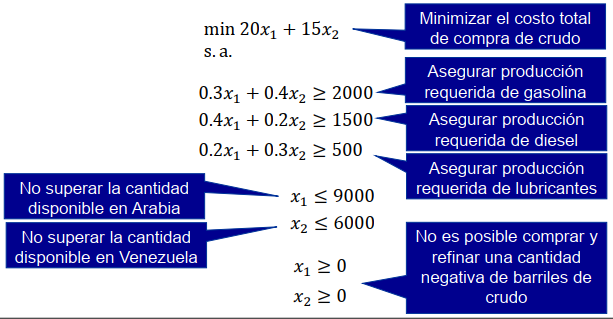

In [ ]:
#!pip install pulp
#!pip install cbcpy

In [18]:
import pulp as plp
import numpy as np

# Declaramos el problema
modelo_medicamentos=plp.LpProblem("MedicamentosX",plp.LpMinimize)

# creamos las variables y asignamos su tipo (entero, continuo, binario)
x_a=plp.LpVariable("Nacional",0,None,plp.LpContinuous)
x_b=plp.LpVariable("Internacional",0,None,plp.LpContinuous)

# Declaramos la función objetivo
modelo_medicamentos+= 20*x_a+15*x_b, "Función Objetivo"

modelo_medicamentos+= 0.3*x_a+0.4*x_b>=2000, "RequerimientoX"
modelo_medicamentos+= 0.4*x_a+0.2*x_b>=1500, "RequerimientoY"
modelo_medicamentos+= 0.2*x_a+0.3*x_b>=500, "RequerimientoZ"
modelo_medicamentos+=x_a<=9000, "Disponibilidad Nacional"
modelo_medicamentos+=x_b<=6000, "Disponibilidad Internacional"

modelo_medicamentos

MedicamentosX:
MINIMIZE
15*Internacional + 20*Nacional + 0
SUBJECT TO
RequerimientoX: 0.4 Internacional + 0.3 Nacional >= 2000

RequerimientoY: 0.2 Internacional + 0.4 Nacional >= 1500

RequerimientoZ: 0.3 Internacional + 0.2 Nacional >= 500

Disponibilidad_Nacional: Nacional <= 9000

Disponibilidad_Internacional: Internacional <= 6000

VARIABLES
Internacional Continuous
Nacional Continuous

In [19]:
modelo_medicamentos.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/user/opt/anaconda3/envs/apricot-env/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/xc/t5gbnt3n5sq5bkg65xw9f1g00000gn/T/9c904b7c8468430681964c037aca3e7c-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/xc/t5gbnt3n5sq5bkg65xw9f1g00000gn/T/9c904b7c8468430681964c037aca3e7c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 10 COLUMNS
At line 21 RHS
At line 27 BOUNDS
At line 28 ENDATA
Problem MODEL has 5 rows, 2 columns and 8 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (-2) rows, 2 (0) columns and 6 (-2) elements
0  Obj 14997.998 Primal inf 8604.4086 (3)
2  Obj 92500
Optimal - objective value 92500
After Postsolve, objective 92500, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 92500 - 2 iterations time 0.002, Presolve 0.00
Option for printing

1

In [20]:
for variable in modelo_medicamentos.variables():
    print("{} = {}".format(variable.name, variable.varValue))

Internacional = 3500.0
Nacional = 2000.0


# Construcción de modelos de gran escala de manera paramétrica

In [25]:

modelo_medicamentos=plp.LpProblem("MedicamentosX",plp.LpMinimize)

ctr={}
costs=[20,15]
coef=[[0.3,0.5],
      [0.4,0.2],
      [0.2,0.3]]
requirements=[2000,1500,500]
upper_bounds=[9000,6000]

x_a=plp.LpVariable("ProveedorA",0,None,plp.LpContinuous)
x_b=plp.LpVariable("ProveedorB",0,None,plp.LpContinuous)
x=np.array([x_a,x_b])
modelo_medicamentos.setObjective(plp.lpSum(np.dot(costs,x)))

i=0
for c in coef:
    ctr[i]=plp.LpConstraint(e=plp.lpSum(np.dot(c,x)),sense=plp.LpConstraintGE,rhs=requirements[i],name="Requerimiento"+str(i+1))
    modelo_medicamentos.addConstraint(ctr[i])
    i=i+1

for i in range(len(upper_bounds)):
    modelo_medicamentos+=x[i]<=upper_bounds[i], "Requerimiento"+str(i+6)    
modelo_medicamentos.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/user/opt/anaconda3/envs/apricot-env/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/xc/t5gbnt3n5sq5bkg65xw9f1g00000gn/T/a335e7a694484924806046e12d1eaf5f-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/xc/t5gbnt3n5sq5bkg65xw9f1g00000gn/T/a335e7a694484924806046e12d1eaf5f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 10 COLUMNS
At line 21 RHS
At line 27 BOUNDS
At line 28 ENDATA
Problem MODEL has 5 rows, 2 columns and 8 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (-2) rows, 2 (0) columns and 6 (-2) elements
0  Obj 14997.998 Primal inf 7716.8936 (3)
2  Obj 87500
Optimal - objective value 87500
After Postsolve, objective 87500, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 87500 - 2 iterations time 0.002, Presolve 0.00
Option for printing

1

In [28]:
# Importar funciones para modelar de PuLP
import pulp as plp

# Crea una lista con los paises de origen
Origen = ['Proveedor_A','Proveedor_B']

# Crea un diccionario que vincula cada origen con la capacidad de produccion
Capacidad = {'Proveedor_A': 9000,
             'Proveedor_B':6000}

# Crea un diccionario que vincula cada origen con la capacidad de produccion
Costo = {'Proveedor_A': 20,
         'Proveedor_B': 15
          }

# Crea una lista con todos los productos
Bars = ["Gasolina", "Diesel", "Lubricantes"]

# Crea un diccionario que vincula cada producto a la demanda que se dese satisfacer
Demanda = {"Gasolina":2000,
          "Diesel":1500,
          "Lubricantes":500}

# 
p={
    ('Proveedor_A',"Gasolina"):0.3,
    ('Proveedor_A',"Diesel"):0.4,
    ('Proveedor_A', "Lubricantes"):0.2,
    ('Proveedor_B',"Gasolina"):0.4,
    ('Proveedor_B',"Diesel"):0.2,
    ('Proveedor_B', "Lubricantes"):0.3
}


# Crea un 'Modelo' que va a contener todos los componentes del problema, lo establece como un problema de minimización
Modelo = plp.LpProblem("2Crudes_Inc.",plp.LpMinimize)

#Declarar las variables que se usaran en la construcción del modelo
x=plp.LpVariable.dicts("x",Origen,0,None,plp.LpContinuous)

# El objetivo es 
Modelo += plp.lpSum([x[i]*Costo[i] for i in Origen]), "Costo total del plan"

for j in Bars:
    Modelo += plp.lpSum([x[i]*p[i,j] for i in Origen])>=Demanda[j], "Demanda de "+j

for i in Origen:
    Modelo += x[i]<=Capacidad[i], "Capacidad de "+i


# The problem is solved using PuLP's choice of Solver
Modelo.solve()

# The status of the solution is printed to the screen
print("Status:", plp.LpStatus[Modelo.status])

# Each of the variables is printed with it's resolved optimum value
for v in Modelo.variables():
    print(v.name, "=", v.varValue)

# The optimised objective function value is printed to the screen    
print("Costo total del plan = ", plp.value(Modelo.objective))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/user/opt/anaconda3/envs/apricot-env/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/xc/t5gbnt3n5sq5bkg65xw9f1g00000gn/T/c3cc9719635949e1a5f0e8828c826d7a-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/xc/t5gbnt3n5sq5bkg65xw9f1g00000gn/T/c3cc9719635949e1a5f0e8828c826d7a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 10 COLUMNS
At line 21 RHS
At line 27 BOUNDS
At line 28 ENDATA
Problem MODEL has 5 rows, 2 columns and 8 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (-2) rows, 2 (0) columns and 6 (-2) elements
0  Obj 14997.998 Primal inf 8604.4086 (3)
2  Obj 92500
Optimal - objective value 92500
After Postsolve, objective 92500, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 92500 - 2 iterations time 0.002, Presolve 0.00
Option for printing